# Loss Functions

## References 

- https://en.wikipedia.org/wiki/Loss_functions_for_classification
- https://en.wikipedia.org/wiki/Hinge_loss
- https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote10.html

In [1]:
import numpy as np
from sklearn import metrics

import matplotlib.pyplot as plt


plt.style.use("fivethirtyeight")

## Classification Loss

In [2]:
y_true = np.array([1, -1, 1, -1, 1, -1, 1, -1, 1])
y_pred = np.array([-1, -1, 1, -1, 1, -1, -1, -1, 1])

### Hinge Loss

\begin{align}
L(h_w(x_i, y_i)) = \max(1 - h_w(x_i) y_i, 0)^p
\end{align}

| p | Usecase | 
|-|-|
| p = 1 | SVM |
| p = 2 | Squared Loss SVM |

In [3]:
def hinge_loss(y_true, y_pred, p):
    return np.power(np.max(np.c_[1 - (y_true * y_pred), np.zeros_like(y_true)], axis=1), p).mean()

In [4]:
hinge_loss(y_true, y_pred, 1)

0.4444444444444444

In [5]:
hinge_loss(y_true, y_pred, 2)

0.8888888888888888

In [6]:
metrics.hinge_loss(y_pred, y_true)

0.4444444444444444

### Log Loss

\begin{align}
L(h_w(x_i, y_i)) = \log(1 + e^{- y_i  h_w(x_i)})
\end{align}

* Used for Logistic Regression

In [7]:
def logistic_loss(y_true, y_pred):
    return np.log(1 + np.exp(-(y_true * y_pred))).mean()

def log_loss(y_true, y_pred):
    return ((y_true * np.log(y_pred)) + ((1 - y_true) * np.log(1 - y_pred))).mean()

In [8]:
logistic_loss(y_true, y_pred)

0.535483909740445

In [9]:
metrics.log_loss(y_true, y_pred, labels=[1, -1], normalize=True)

7.6752836433134854

### Exponential Loss

\begin{align}
L(h_w(x_i, y_i)) = e^{-h_w(x_i) y_i} 
\end{align}

* Adaboost

In [10]:
def exp_loss(y_true, y_pred):
    return np.exp(-(y_pred * y_true)).mean()

In [11]:
exp_loss(y_true, y_pred)

0.8901910827909096

### Zero-One Loss

\begin{align}
L(h_w(x_i, y_i)) &= \delta(sign({h_w(x_i)) \ne y_i}) \\
\delta &= \begin{cases} 1 \text{ if } sign(h_w(x_i)) \ne y_i\\ \\ 0 \text{ otherwise} \end{cases}
\end{align}

In [17]:
def zero_one_loss(y_true, y_pred):
    return np.int32(np.sign(y_pred) != y_true).mean()

In [18]:
zero_one_loss(y_true, y_pred)

0.2222222222222222

### Graphical Representation

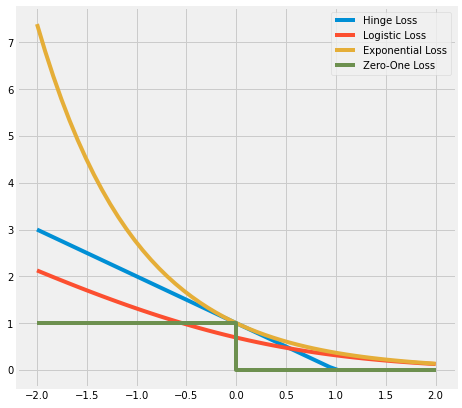

In [43]:
n_samples = 50

x = np.linspace(-2, 2, n_samples)
y = np.ones_like(x)

hl, ll, el, zol = [], [], [], []

for i in range(n_samples):
    hl.append(hinge_loss(x[i], y[i], 1))
    ll.append(logistic_loss(x[i], y[i]))
    el.append(exp_loss(x[i], y[i]))
    zol.append(zero_one_loss(y[i], x[i]))



fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(x, hl, label='Hinge Loss')
ax.plot(x, ll, label='Logistic Loss')
ax.plot(x, el, label='Exponential Loss')
ax.plot(np.int32(x), zol, label='Zero-One Loss')

plt.legend()
plt.show()

## Regression Loss

### Squared Loss

\begin{align}
L(h_w(x_i), y_i) &= (h_w(x_i) - y_i)^2
\end{align}

In [15]:
def squared_loss(y_true, y_pred):
    return np.square(y_pred - y_true)

### Absolute Loss

\begin{align}
L(h_w(x_i), y_i) &= (h_w(x_i) - y_i)^2
\end{align}

In [16]:
def absolute_loss(y_true, y_pred):
    return np.abs(y_pred - y_true)

<!-- ### Huber Loss ### Log Cosh -->